# Scipy

![](https://www.fullstackpython.com/img/logos/scipy.png)

Scipy, pronounced as Sigh Pi, is a scientific python open source library to perform Mathematical, Scientific and Engineering computations. 

The SciPy library depends on NumPy library

## SciPy subpackages

![](https://miro.medium.com/max/10996/1*D5SkkJwO8oegwUE14SJH5w.png)

## SciPy Optimize package

- `minimize_scalar()` and `minimize()` to optimize a function of one variable and many variable respectively. 
- `curve_fit()` to fit a function to a set of data
- `root_scalar()` and `root()` to find the zeros of a function of one variable and many variables respectively.

### Minimize the function with one variable

In [4]:
from scipy.optimize import minimize_scalar

def function(x):
    return (3*x**4 - 2*x + 1)

In [5]:
function(2)

45

In [6]:
res = minimize_scalar(function)

In [7]:
res

 message: 
          Optimization terminated successfully;
          The returned value satisfies the termination criteria
          (using xtol = 1.48e-08 )
 success: True
     fun: 0.17451818777634331
       x: 0.5503212087491959
     nit: 12
    nfev: 15

In [8]:
res.x

np.float64(0.5503212087491959)

In [9]:
res.fun

np.float64(0.17451818777634331)

In [10]:
def func(x):

    return 4*x**2 - 3*x + 2

In [11]:
minimize_scalar(func).fun

np.float64(1.4375)

In [12]:
def f(x):

    return (-3*(x-3)**2 + 5)

In [13]:
minimize_scalar(f)

c:\Users\Sourav Karmakar\Desktop\Work\LogicMojo\logicmojo-data-science-april-2025\.venv\Lib\site-packages\scipy\optimize\_optimize.py:3011: RuntimeWarning: overflow encountered in scalar multiply
  w = xb - ((xb - xc) * tmp2 - (xb - xa) * tmp1) / denom
c:\Users\Sourav Karmakar\Desktop\Work\LogicMojo\logicmojo-data-science-april-2025\.venv\Lib\site-packages\scipy\optimize\_optimize.py:3004: RuntimeWarning: overflow encountered in scalar multiply
  tmp1 = (xb - xa) * (fb - fc)
c:\Users\Sourav Karmakar\Desktop\Work\LogicMojo\logicmojo-data-science-april-2025\.venv\Lib\site-packages\scipy\optimize\_optimize.py:3005: RuntimeWarning: overflow encountered in scalar multiply
  tmp2 = (xb - xc) * (fb - fa)
c:\Users\Sourav Karmakar\Desktop\Work\LogicMojo\logicmojo-data-science-april-2025\.venv\Lib\site-packages\scipy\optimize\_optimize.py:3006: RuntimeWarning: invalid value encountered in scalar subtract
  val = tmp2 - tmp1
C:\Users\Sourav Karmakar\AppData\Local\Temp\ipykernel_24724\2576813508.p

 message: 
          Optimization terminated successfully;
          The returned value satisfies the termination criteria
          (using xtol = 1.48e-08 )
 success: True
     fun: -inf
       x: -1.7095457019956215e+154
     nit: 35
    nfev: 773

In [14]:
def g(x):
    return (-1)*f(x)

In [15]:
f(2)

2

In [16]:
g(2)

-2

In [17]:
res = minimize_scalar(g)

In [18]:
f(res.x)

np.float64(5.0)

In [21]:
# Same using decorator

def negative(func):

    def wrapper(*args):
        result = func(*args)
        return -result
    
    return wrapper

In [24]:
negative(f)(3)

-5

In [25]:
@negative

def g(x):
    return f(x)

In [27]:
g(5)

7

In [28]:
minimize_scalar(g)

 message: 
          Optimization terminated successfully;
          The returned value satisfies the termination criteria
          (using xtol = 1.48e-08 )
 success: True
     fun: -5.0
       x: 3.0000000000000004
     nit: 4
    nfev: 9

In [29]:
# Write your own maximize_scalar() function

In [34]:
def maximize_scalar(func):
    obj_func = negative(func)
    res = minimize_scalar(obj_func)
    result = {"x": res.x, "fun": func(res.x)}
    return result

In [35]:
maximize_scalar(f)

{'x': np.float64(3.0000000000000004), 'fun': np.float64(5.0)}

### scipy.differentiate

In [36]:
from scipy.differentiate import derivative
import numpy as np

In [37]:
def sigmoid(x, alpha=1, beta=0):
    return (1/(1 + np.exp((-1)*(alpha*x+beta))))

In [38]:
from matplotlib import pyplot as plt

In [39]:
x = np.linspace(-10,10,10000)
y = sigmoid(x)

In [40]:
x

array([-10.       ,  -9.9979998,  -9.9959996, ...,   9.9959996,
         9.9979998,  10.       ], shape=(10000,))

In [41]:
y

array([4.53978687e-05, 4.54887603e-05, 4.55798338e-05, ...,
       9.99954420e-01, 9.99954511e-01, 9.99954602e-01], shape=(10000,))

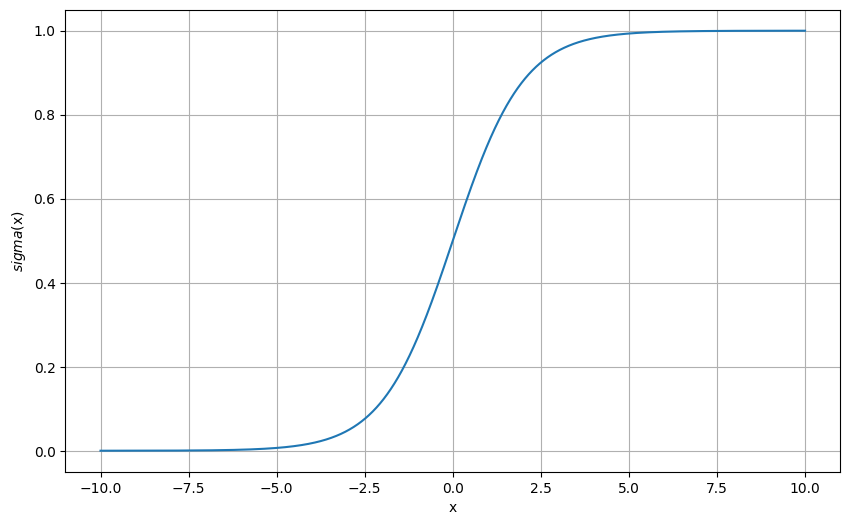

In [42]:
plt.figure(figsize=(10,6))
plt.plot(x,y)
plt.xlabel("x")
plt.ylabel("$sigma$(x)")
plt.grid()
plt.show()

In [43]:
diff_sigmoid = derivative(sigmoid, x)

In [44]:
diff_sigmoid

     success: [ True  True ...  True  True]
      status: [0 0 ... 0 0]
          df: [ 4.540e-05  4.549e-05 ...  4.549e-05  4.540e-05]
       error: [ 1.165e-16  1.166e-16 ...  2.673e-15  2.304e-16]
         nit: [2 2 ... 2 2]
        nfev: [11 11 ... 11 11]
           x: [-1.000e+01 -9.998e+00 ...  9.998e+00  1.000e+01]

In [45]:
dsigmoid = diff_sigmoid.df

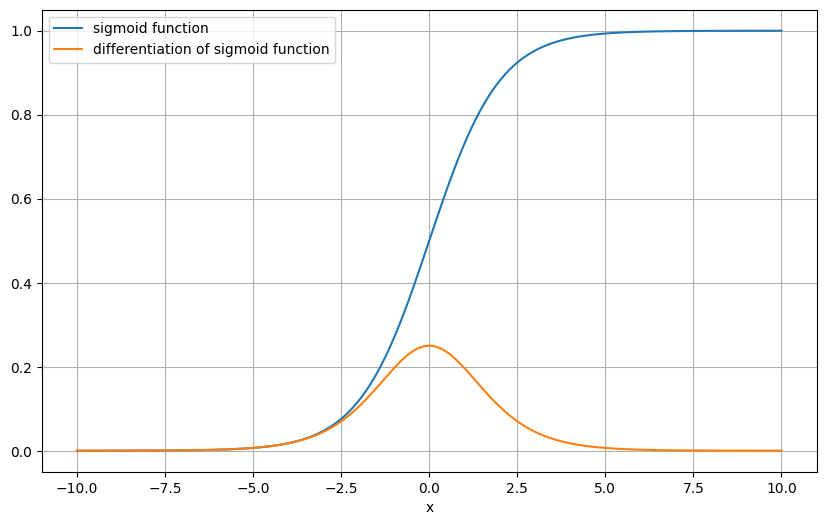

In [46]:
plt.figure(figsize=(10,6))
plt.plot(x,y,label="sigmoid function")
plt.plot(x,dsigmoid,label="differentiation of sigmoid function")
plt.xlabel("x")
plt.ylabel("")
plt.grid()
plt.legend()
plt.show()

In [47]:
def mul_func(args):
    x,y,z = args
    return 3*(x-2)**2 + 4*(y-3)**2 + 5*(z-1)**2

In [48]:
from scipy.optimize import minimize

In [49]:
initial_guess = [1, 1, 1]
res = minimize(mul_func, initial_guess)

In [50]:
res

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 6.612549871173688e-16
        x: [ 2.000e+00  3.000e+00  1.000e+00]
      nit: 10
      jac: [ 1.475e-09 -7.735e-10 -1.750e-11]
 hess_inv: [[ 1.680e-01 -5.313e-04 -9.618e-06]
            [-5.313e-04  1.252e-01  3.782e-06]
            [-9.618e-06  3.782e-06  1.000e-01]]
     nfev: 48
     njev: 12